# Chapter 10: Object-Oriented Programming

### 10.1 Introduction

**Class libraries and object-based programming**
- Open-source library classes are more likely to be thoroughly tested, bug free, performance tuned and portable across a wide range of devices, operating systems, and Python bersions

**Creating your own custom classes**
- Classes are new data types

**Inheritance**
- New classes can be formed through inheritance and composition from classes in abudant class libraries
- When creating a new class, instead of writing all new code, you can designate that the new class is to be formed initially by inheriting the attributes (variables) and methods (the class version of functions) of a previously defined base class (also called a superclass)
- The new class is called a derived class (subclass)
- To minimize the customization effort, you should always try to inherit from the base class that's clasest to your needs

**Polymorphism**
- Polymorphism enables you to program "in the general" rather than "in the specific"
- You send the same method call to objects possibly of many different types. Each object responds by "doing the right thing."
- The same method call takes on many forms

**Data Classes**
- Python 3.7's new data classes help you build classes faster by using a more concise notation and by autogenerating portions of the classes

### 10.2 Custom Class Account

**Importing classes Account and Decimal**
- Class Account maintains and manipulates the account balance as a Decimal, so we also import class Decimal


In [1]:
from account import Account

In [2]:
from decimal import Decimal

**Create an Account Object with a Constructor Expression**
- A **constructor expression** builds and initializes an object of the class. Constructor expressions create new objects and initialize their data using arguments specified in the parentheses. The parentheses following the class name are required, even if there are no arguments

In [3]:
account1 = Account('John Green', Decimal('50.00'))

**Getting an Account's Name and Balance**

In [4]:
account1.name

'John Green'

In [5]:
account1.balance

Decimal('50.00')

**Depositing Money into an Account**

In [6]:
account1.deposit(Decimal('25.53'))
account1.balance

Decimal('75.53')

**Account Methods Perform Validation**

In [7]:
account1.deposit(Decimal('-123.45'))

ValueError: amount must be positive.

### 10.3 Controlling Access to Attributes
- The Account's methods can validate their arguments to ensure the balance is always valid
- Data attributes cannot validate the values you assign them

In [8]:
account1.balance = Decimal('-1000.00')

account1.balance

Decimal('-1000.00')

**Encapsulation**
- A class's client code is any code that uses objects of the class
- Most object-oriented programming languages enable you to encapsulate (or hide) an object's data from the client code
- Such data in these languages is said to be private data

**Leading Underscrore Naming Convention**
- Python does not have private data
- Instead, you use naming conventions to design classes that encourage correct use
- Python programmers know that any attribute name beginning with an underscore is for a class's internal use only
- Attributes whose identifiers do not begin with an underscore are considered publicly accesible for use in client code
- Attributes are always accessible


### 10.4 Properties for Data Access

**Testing Time object**

In [9]:
from timewithproperties import Time

**Create a Time Object**

In [10]:
wake_up = Time(hour=6, minute=30) # second is default 0

In [11]:
wake_up # This uses the __repr__ special method

Time(hour=6, minute=30, second=0)

In [12]:
print(wake_up) # This uses the __str__ special method

6:30:00 AM


**Getting an attribute via a property**

In [13]:
wake_up.hour

6

**Setting the Time**

In [14]:
wake_up.set_time(hour=7, minute=45)

wake_up

Time(hour=7, minute=45, second=0)

**Set an attribute via a property**

In [15]:
wake_up.hour = 6

wake_up

Time(hour=6, minute=45, second=0)

**Attempting to set an invalid value**

In [16]:
wake_up.hour = 100

ValueError: Hour (100) must be 0-23

### 10.4 Self Check

In [17]:
from timewithproperties import Time

In [18]:
t = Time(5, 30, 15)

In [19]:
t

Time(hour=5, minute=30, second=15)

In [20]:
t.time = (12, 30, 45)

In [21]:
t.time

(12, 30, 45)

In [22]:
t

Time(hour=12, minute=30, second=45)

### 10.4.3 Class Time Definition Design Notes

**Interface of a Class**
- Class Time's properties and methods define the class's public interface (the set of properties and methods programmers should use to interact with objects of the class)

**Attributes are always accessible**
- Python does not prevent you from directly manipulating the data attributes _hour, _minute, and _second
- Nothing in Python makes it possible to enforce data hiding

In [23]:
from timewithproperties import Time

wake_up = Time(hour=7, minute=45, second=30)

wake_up.hour

7

In [24]:
wake_up._hour

7

In [25]:
wake_up._hour = 100
wake_up

Time(hour=100, minute=45, second=30)

**Properties**
- A getter seems to allow clients to read the data at will, but the getter can control the formatting of the data
- A setter can scrutinize attempts to modify the value of a data attribute to prevent the data from being set to an invalid value

**Utility methods**
- Some methods serve as utility methods used only inside the class and are not intended to be part of the class's public interface
- Such methods should be named with a single leading underscore

**Module datetime**
- Instead of building your own class to represent times and dates, you'll typically use the Python Standard Library datetime module

### 10.5 Simulating "Private" Attributes
- Python objects' attributes are always accessible
- Python has a naming convention for private attributes
- To help prevent clients from accessing "private" attributes, Python renames them by preceding the attribute with _ClassName, as in _Time__hour
- This is called name mangling

**IPython auto-completion shows only "public" attributes**
- IPython does not show attributes with one or two leading underscores when you try to auto-complete an expression

In [26]:
from private import PrivateClass

my_object = PrivateClass()

my_object.public_data

'public'

In [27]:
my_object.__private_data # Not accesible because Python renames the attribute

AttributeError: 'PrivateClass' object has no attribute '__private_data'

In [28]:
my_object._PrivateClass__private_data

'private'

In [29]:
my_object._PrivateClass__private_data = 'modified'
my_object._PrivateClass__private_data

'modified'

### 10.6.4 Displaying Card Images with Matplotlib

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # used to load the images

from deck import DeckOfCards

deck_of_cards = DeckOfCards()

**Enable matplotlib**

In [31]:
%matplotlib inline

**Create the base path for each image**

In [32]:
from pathlib import Path

path = Path('.').joinpath('card_images')

**Create the figure and axes objects**

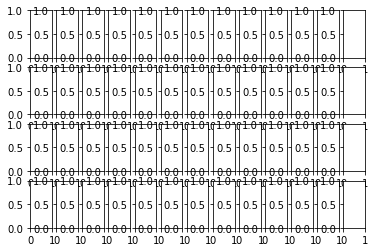

In [33]:
figure, axes_list = plt.subplots(nrows=4, ncols=13)

**Configure the axes objects and display the images**

In [34]:
deck_of_cards.shuffle()

for axes in axes_list.ravel():
    axes.get_xaxis().set_visible(False) # hide the x-axis
    axes.get_yaxis().set_visible(False) # hide the y-axes
    image_name = deck_of_cards.deal_card().image_name 
    img = mpimg.imread(str(path.joinpath(image_name).resolve())) # load the image
    axes.imshow(img) # display the image in the subplot

TypeError: expected str, bytes or os.PathLike object, not method

**Maximize the image sizes**

In [35]:
figure.tight_layout()

C:\Users\abbyl\AppData\Local\Temp\ipykernel_10044\1210551376.py:1: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  figure.tight_layout()


### 10.7 Inheritance: Base Classes and SubClasses
- Every subclass object is an object of its base class
- One base class can have many subclasses

**Inheritance Hierarchy**
- Single inheritance: a class is derived from one base class
- Multiple inheritance: a subclass inherits from two or more base classes

**"is a" vs "has a"**
- Inheritance produces "is-a" relationships in which an object of a subclass type may also be treated as an object of the base-class type
- "Has-a" relationships have references to one or more objects of other classes as members

### 10.8 Building an Inheritance Hierarchy; Introducing Polymorphism
- Base class: ComissionEmployee
- Subclass: SalariedComissionEmployee

### 10.8.1 Base Class ComissionEmployee

In [36]:
from commissionemployee import CommissionEmployee

from decimal import Decimal

c = CommissionEmployee('Sue', 'Jones', '333-33-3333',
                       Decimal('10000.00'), Decimal('0.06'))

c

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06

In [37]:
print(f'{c.earnings():,.2f}')

600.00


In [38]:
c.gross_sales = Decimal('20000.00')
c.commission_rate = Decimal('0.1')
print(f'{c.earnings():,.2f}')

2,000.00


### 10.8.2 Subclass SalariedCommissionEmployee
- With single inheritance, the subclass starts essentially the same as the base class
- Inheritance enables us to absorb the features of a class without duplicationg code

**Testing Class SalariedCommissionEmployee**

In [39]:
from salariedcommissionemployee import SalariedCommissionEmployee
from decimal import Decimal

s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444', Decimal('5000.00'), 
                               Decimal('0.04'), Decimal('300.00'))

print(s.first_name, s.last_name, s.ssn, s.gross_sales, s.commission_rate, s.base_salary)

Bob Lewis 444-44-4444 5000.00 0.04 300.00


In [40]:
print(f'{s.earnings():,.2f}')

500.00


In [41]:
s.gross_sales = Decimal('10000.00')

s.commission_rate = Decimal('0.05')

s.base_salary = Decimal('1000.00')

print(s)

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 10000.00
commission rate: 0.05
base salary: 1000.00


In [42]:
print(f'{s.earnings():,.2f}')

1,500.00


**Testing the "is a" relationship""**
- issubclass and isinstance are used for testing "is a" relationships
- issubclass detrmines whether one class is derived from another
- isinstance determines whether an object has an "is a" relationship

In [43]:
isinstance(s, CommissionEmployee)

True

In [44]:
isinstance(s, SalariedCommissionEmployee)

True

### 10.8.3 Processing CommissionEmployees and SalariedCommissionEmployees Polymorphically
- With inheritance, every object of a subclass also may be treated as an object of that subclass's base class
- We can place objects related through inheritance into a list, then iterate through the list and treat each element as a base-class object
- This allows a variety of objects to be processed in a general way

In [45]:
employees = [c, s]

for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}')

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 20000.00
commission rate: 0.10
2,000.00
SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 10000.00
commission rate: 0.05
base salary: 1000.00
1,500.00


### 10.9 Duck Typing and Polymorphism
- Python uses duck typing to achieve polymorphic behavior
- **Duck typing**: A programming style which does not look at an object's type to determine if it has the right interface: instead, the method or attribute is simply called or used
- ("If it looks like a duck and quacks like a duck, it must be a duck.")
- All classes inherit from ojbect directly or indirectly, so they all inherit the default methods for obtaining string representations that print can display

In [46]:
class WellPaidDuck:
    def __repr__(self):
        return 'I am a well-paid duck'
    def earnings(self):
        return Decimal('1_000_000.00')

In [47]:
from decimal import Decimal

from commissionemployee import CommissionEmployee

from salariedcommissionemployee import SalariedCommissionEmployee

c = CommissionEmployee('Sue', 'Jones', '333-33-3333', Decimal('1000.00'), Decimal('0.06'))

s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444', Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))

d = WellPaidDuck()

employees = [c, s, d]

In [48]:
for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 1000.00
commission rate: 0.06
60.00

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 5000.00
commission rate: 0.04
base salary: 300.00
500.00

I am a well-paid duck
1,000,000.00



### 10.0 Operator Overloading
- You can overload most operators
- For every overloadable operator, class object defines a special method, such as \__add__ for the addition (+) operator or \__mul__ for the multiplication operator
- Overiding these methods enables you to define how a given operator works for objects of your custom class

**Operator overloading restrictions:**
- The precedence of an operator cannot be changed by overloading. However, parentheses can be used to force evaluation order in an expression
- The left-to-right or right-to-left grouping of an operator cannot be changed by overloading
- The "arity" of an operator (unary or binary) cannot be changed
- You cannot create new operators
- The  meaning of how an operator works on objects of built-in types cannot be changed
- Operator overloading works only with objects of custom classes or with a mixture of an object of a custom class and an object of a built-in type

**Complex numbers**
- Like ints, floats, and Decimals, complex numbers are arithmetic types

### 10.10.1 Test-Driving Class Complex

In [ ]:
from complexnumber import Complex

In [ ]:
x = Complex(real=2, imaginary=4)

x

In [ ]:
y = Complex(real=5, imaginary=-1)
y

In [ ]:
x + y

In [ ]:
x

In [ ]:
y

In [ ]:
x += y
x

In [ ]:
y

### 10.11 Exception Class Hierarcy and Custom Exceptions
- Exception classes inherit directly or indirectly from base class Base-Exception and are defined in module exceptions

Python defines four primary BaseException subclasses
- SystemExit terminates program execution and when uncaught does not produce a traceback like other exception types
- KeyboardInterrupt exceptions occur when the user types the interrupt Ctrl + C
- GeneratorExit exceptions occur when a generator closes--normally when a generator finishes producing values or when its close method is called explicitly
- Exceptions is the base class for most common exceptions you'll encounter (ValueError, NameError, ZeroDivisionError, etc.)

**Catching Base-Class Exceptions**
- An except handler can catch exceptions of a particular type or can use a base-class type to catch those base-class exceptions and all related subclass exceptions.
- An except handler that specifies the base class Exception can catch objects of any subclass of Exception
- Placing an except handler that catches type Exception before other except handlers is a logic error, because all exceptions would be caught before other exception handlers could be reached

**Custom Exception Classes**
- When you raise an exception from your code, you should generally use one of the existing exception classes from the Python Standard Library
- You can create your own custom exception classes that derive directly or indirectly from class Exception
- Define new exception classes only if you need to catch and handle the exceptions differently from other existing exception types. This should be rare.

### 10.12 Named Tuples
- The Python Standard Library's collections module also provides named tuples that enable you to reference a tuple's members by name rather than index number

In [ ]:
from collections import namedtuple
# namedtubple creates a subclass of the built-in tuple type

In [ ]:
Card = namedtuple('Card', ['face', 'suit'])
# Creates a new tuple type named Card
# can be used anwhere a tuple can be used

In [ ]:
card = Card(face='Ace', suit='Spades')

card.face

In [ ]:
card.suit

In [ ]:
card

**Other named tuple features**
- Each named tuple type has additional methods
- The _make class method receives an iterable of values and returns an object of the named tuple type
- This could be useful if you have a named tuple type representing records in a CSV file
- As you read and tokenize CSV records, you could convert them into named tuple objects
- For a given object of a named tuple type, you can get an OrderedDict representation of the object's member names and values. An OrderedDict remembers the order in which its key-value pairs were inserted in the dictionary

In [ ]:
values = ['Queen', 'Hearts']

card = Card._make(values)

card

In [ ]:
card._asdict()

### 10.12 Self Check

In [ ]:
from collections import namedtuple

Time = namedtuple('Time', ['hour', 'min', 'sec'])

t = Time(7, 30, 0)

t

### 10.13 A Brief Intro to Python 3.7's New Data Classes
-The new data classes help you build classes faster by using more concise notation and by autogenerating "boilerplate" code that's common in most classes

**Data classes autogenerate Code**
- Data classes autogenerate the data attributes and the \__init__ and \__repr__ methods for you
- Data classes can be generated dynamically from a list of field names
- Data classes also autogenerate method \__eq__, which overloads the == operator. 
- Any class that has an \__eq__ method also implicitly supports !=
- All classes inhert class objects default \__ne__ (not equals) method implementation, which returns the opposite of \__eq__
- Data classes do not automatically generate methods for the <, <=, >, and >= but they can

### 10.13.1 Creating a Card Data Class
- The new class is defined as carddataclass.py
- @dataclass decorator causes various code to be written for you
- We use ClassVar and List from the Python Standard Library's typing module to indicate class variables that refer to lists

### 10.13.2 Using the Card Data Class

In [49]:
from carddataclass import Card

c1 = Card(Card.FACES[0], Card.SUITS[3])
c1

Card(face='Ace', suit='Spades')

In [50]:
print(c1)

Ace of Spades


In [ ]:
c1.face

In [ ]:
c1.suit

In [ ]:
c1.image_name

In [ ]:
c2 = Card(Card.FACES[0], Card.SUITS[3])

c2

In [ ]:
c3 = Card(Card.FACES[0], Card.SUITS[0])
c3

In [ ]:
c1 == c2

In [ ]:
c1 == c3

In [ ]:
c1 != c3

In [51]:
from deck2 import DeckOfCards

deck_of_cards = DeckOfCards()

print(deck_of_cards)

Ace of Hearts      2 of Hearts        3 of Hearts        4 of Hearts        
5 of Hearts        6 of Hearts        7 of Hearts        8 of Hearts        
9 of Hearts        10 of Hearts       Jack of Hearts     Queen of Hearts    
King of Hearts     Ace of Diamonds    2 of Diamonds      3 of Diamonds      
4 of Diamonds      5 of Diamonds      6 of Diamonds      7 of Diamonds      
8 of Diamonds      9 of Diamonds      10 of Diamonds     Jack of Diamonds   
Queen of Diamonds  King of Diamonds   Ace of Clubs       2 of Clubs         
3 of Clubs         4 of Clubs         5 of Clubs         6 of Clubs         
7 of Clubs         8 of Clubs         9 of Clubs         10 of Clubs        
Jack of Clubs      Queen of Clubs     King of Clubs      Ace of Spades      
2 of Spades        3 of Spades        4 of Spades        5 of Spades        
6 of Spades        7 of Spades        8 of Spades        9 of Spades        
10 of Spades       Jack of Spades     Queen of Spades    King of Spades     

### 10.3.3 Data Class Advantages over Named Tuples

Data Classes offer several advantages over named tuples:
- Different named tuple types could compare as equal if they have the same number of members and the same values for those members. Comparing objects of different data classes always returns False
- If you have code that unpacks a tuple, adding more members to that tuple breaks the unpacking code. Data objects cannot be unpacked.
- A data class can be a base class or a subclass in an inheritance hierarchy

### 10.13.4 Data Class Advantages over Traditional Classes

Data classes offer various advantages over the traditional Python classes:
- A data class autogenerates
- When you change data attributes defined in a data class, then use it in a script the autogenerated code updates automatically
- The required variable annotations for class attributes and data attributes enable you to take advantage of static code analysis tools
- Some static code analysis tools and IDEs can inspect variable annotations and issue warning if your code uses the wrong type

Data classes have additional capabilities, such as creating "frozen" instances which do not allow you to assign values to a data class object's attributes after the object is created.

### 10.14 Unit Testing with Docstrings and doctest

**Module doctest and the testmod function**
- When you execute the doctest module's testmod function, it inspects your functions', methods', and classes' docstrings looking for sample Python statements preceded by >>>, each followed on the next line by the given statement's expected output (if any)
- The testmod function then executes those statements and confirms that they produce the expected output.
- If they do not, testmod reports errors indicating which tests failed so you can locate and fix the problems in your code
- Such tests are called unit tests

### 10.15 Namespaces and Scopes
- Scopes are determined by namespaces, which associate identifiers with objects and are implemented "under the hood" as dictionaries
- All namespaces are independent of one another
- The same identifier may appear in multiple namespaces
- There are three primary namespaces--local, global, and built-in

**Local namespace**
- associates local identifiers (parameters/local variables) with objects
- The local namespace exists from the moment the function or method is called until it terminates and is accessible only to that function or method
- Inside a function or method's suite, assigning to a variable that does not exist creates a local variable and adds it to the local namespace

**Global namespace**
- Each module has a global namespace that associates a module's global identifiers with objects
- Python creates a module's global namespace when it loads the module
- A module's global namespace exists and its identifiers are in sclope to the code within that module until the program (or interactive session) terminates
- An IPython session has its own global namespace for all the identifiers you create in that session
- Each module's global namespace also has an identifier called \__name__ containing the module's name
- \__name__ contains '\__main__' for a .py file that you run as a script

**Built-in namespace**
- The built-in namespace associates identifiers for Python's built-in functions (such as input and range) and types (such as int, float, and str) with objects that define those functions and types
- Python creates the built-in namespace when the interpreter starts executing
- These identifiers remain in scope for all code until the program terminates

**Finding identifiers in namespace**
- When you use an identifier, Python searches for that identifier in the currently accessible namespaces, procedeeding from local to global to built-in.

In [52]:
z = 'global z'

def print_variables():
    y = 'local y in print_variables'
    print(y)
    print(z)

print_variables()


local y in print_variables
global z


In [53]:
y

NameError: name 'y' is not defined

In [54]:
z

'global z'

**Nested functions**
- When you access an identifier inside a nested function, Python searches the nested function's local namespace first, then the enclosing function's namespace, then the global namespace, and finally the built-in namespace
- This is referred to as the LEGB (local, enclosing, global, built-in) rule

**Class Namespace**
- A class has a namespace in which its class attributes are stored
- Python looks for that attribute first in the class's namespace, then in the base class's namespace until it reaches class object

**Object Namespace**
- Each object has its own namespace containing the object's methods and data attributes
- the class's \__init__ method starts with an empty object (self) and adds each attribute to the object's namespace


### 10.16 Time Series and Simple Linear Regression
- Time series are sequences of values (called observations) associated with points in time
- Time series are popular in financial applications and with the Internet of Things

**Time series**
- Univariate time series have one observation per time
- Multivariate time series have two or more observations per time

**Two tasks often performed with time series:**
- Time series analysis: looks at existing time series data for patterns
- Time series forecasting: uses past data to predict the future

**Simple linear regression**
- Given a collection of values representing an independent variable and dependent variable, simple linear regression describes the relationship between these variables with a straight line, known as the regression line

In [2]:
# Create fahrenheit temperatures and their corresponding Celsius temperatures 
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range (0, 101, 10)]
          

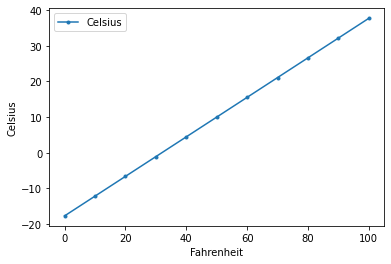

In [3]:
# Plot the temperatures

import pandas as pd
import matplotlib.pyplot as plt

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

**Components of the Simple Linear Regression Equation**
- y = mx + b
- m is the line's slope
- b is the line's intercept with the y-axis
- x is the independent variable
- y is the dependent variable
- In simple linear regression, y is the predicted value for a given x

**Function linregress from SciPy's stats Module**
- The simple linear regression algorithm iteratively adjusts the slope and intercept and, for each adjustment, calculates the square of each point's distance from the line
- The best fit occurs when the slope and intercept values minimize the sume of those squared distances
- This is known as an ordinary least squares calculation

In [2]:
import pandas as pd
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [3]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [4]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [5]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [6]:
nyc.Date.dtype

dtype('int64')

In [7]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [8]:
pd.options.display.precision = 2
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [9]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, 
                                     y=nyc.Temperature)

In [11]:
linear_regression.slope

0.014771361132966163

In [13]:
linear_regression.intercept

8.694993233674289

In [14]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [15]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

(10.0, 70.0)

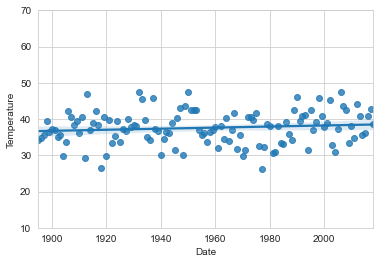

In [19]:
import seaborn as sns
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

In [20]:
# max January temperature in 2021
linear_regression.slope * 2021 + linear_regression.intercept

38.54791408339891